<a href="https://colab.research.google.com/github/sharop/CD3001B/blob/main/clase_1/Tema-1_4-1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalación de librerias

In [ ]:
#!apt-get install r-base
#!pip install rpy2
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 KB 8.3 MB/s eta 0:00:00


#Preparación de ambiente

In [ ]:
# Download the data and assets that this notebook uses
import urllib.request

url_prefix = "https://github.com/jmbejara/comp-econ-sp19/blob/master/lectures/4-23_Panel_Data/"
files = [
    "15_2_Wooldridge_Intro.png",
    "lme.dta",
    "Example_10_4_Wooldridge_Panel.png",
    "Example_10_5_Wooldridge_Panel.png",
    "fixed_and_random_effects.do",
    "St11-12_jtrain1.dta",
    ]
for file in files:
    url = url_prefix + file + "?raw=true"
    urllib.request.urlretrieve(url, f'./{file}')

El codigo que se encuentra en las celdas previas solo es para Google Colab.
El siguiente codigo es generico.

#Exploración del ambiente


In [ ]:
import numpy as np
import pandas as pd
from linearmodels import PanelOLS
from linearmodels import RandomEffects

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import linearmodels
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(1)

In [ ]:
# Muestra simple con datos faltantes.
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([0.1, 10])
e = np.random.normal(size=nsample)
alpha = 1
y = alpha + X @ beta + e
X[3,1] = np.nan # agregamos datos faltantes

###Statsmodel con el API estámdar.

In [ ]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,0.00000,0.000000,2.624345
1,0.10101,0.010203,0.500375
2,0.20202,0.040812,0.900152
3,0.30303,NaN,0.875608
4,0.40404,0.163249,3.538298


In [ ]:
rhs = sm.add_constant(df[['x1', 'x2']])
lhs = df['y']
res = sm.OLS(lhs, rhs, missing='drop').fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.659e+06
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          3.69e-244
Time:                        01:41:01   Log-Likelihood:                -127.54
No. Observations:                  99   AIC:                             261.1
Df Residuals:                      96   BIC:                             268.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8325      0.271      3.068      0.003       0.294       1.371
x1             0.1872      0.124      1.509      0.135      -0.059       0.433
x2             9.9941      0.012    838.517      0.000       9.970      10.018
==============================================================================
Omnibus:                        0.221   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.080
Skew:                           0.069   Prob(JB):                        0.961
Kurtosis:                       3.019   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res.params

const    0.832483
x1       0.187168
x2       9.994077
dtype: float64

### Statsmodels utilizando el API de formula.
Estilo R. Hay qeue revisar que el paquete `import statsmodels.formula.api as smf`

In [ ]:
results = smf.ols(formula="y ~ x1 + x2", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.659e+06
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          3.69e-244
Time:                        01:41:47   Log-Likelihood:                -127.54
No. Observations:                  99   AIC:                             261.1
Df Residuals:                      96   BIC:                             268.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8325      0.271      3.068      0.003       0.294       1.371
x1             0.1872      0.124      1.509      0.135      -0.059       0.433
x2             9.9941      0.012    838.517      0.000       9.970      10.018
==============================================================================
Omnibus:                        0.221   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.080
Skew:                           0.069   Prob(JB):                        0.961
Kurtosis:                       3.019   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#1.4. Modelo de efectos fijos

En statsmodels

ejemplo de la sintaxis de stastsmodels. Referencia: http://statsmodels.sourceforge.net/devel/mixed_linear.html

Dataset obtenido de https://cran.r-project.org/web//packages/geepack/geepack.pdf

In [ ]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("dietox", "geepack").data
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [ ]:
data.describe()

,Pig,Litter,Start,Weight,Feed,Time
count,861.000000,861.000000,861.000000,861.000000,789.000000,861.000000
mean,6238.319396,12.135889,25.672701,60.725769,80.728645,6.480836
std,1323.845928,7.427252,3.624336,24.978881,52.877736,3.444735
min,4601.000000,1.000000,15.000000,15.000000,3.300003,1.000000
25%,4857.000000,5.000000,23.799990,38.299990,32.800003,3.000000
50%,5866.000000,11.000000,25.700000,59.199980,74.499996,6.000000
75%,8050.000000,20.000000,27.299990,81.199950,123.000000,9.000000
max,8442.000000,24.000000,35.399990,117.000000,224.500000,12.000000


In [ ]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"]) 
mdf = md.fit() 
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            
========================================================

"""

#Otro ejemplo

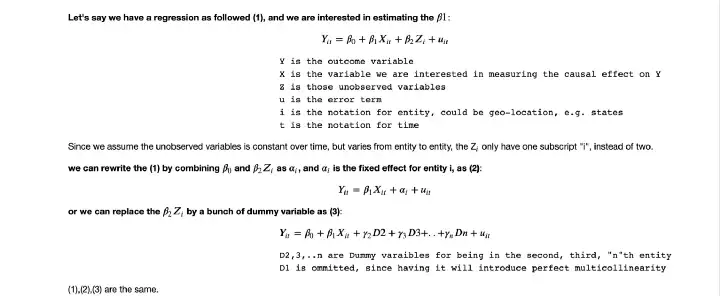

In [ ]:

import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
# load the data

url= "https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/us_driving_fatalities.csv"
df = pd.read_csv(url)



In [ ]:
# define the fatality rate
df["fatal_rate"] = df["fatal"] /df["pop"] * 10000

df_demean = df.copy()



In [ ]:
# calculate the entity(state) mean beer tax
df_demean['Mean_beerTax_byState'] = df_demean.groupby('state').beertax.transform(np.mean)



In [ ]:
# calculate the entity(state) mean for fatal rate
df_demean['Mean_fatal_rate_byState'] = df_demean.groupby('state').fatal_rate.transform(np.mean)



In [ ]:
# demean, subtract each row by the entity-mean
df_demean["fatal_rate"] = df_demean["fatal_rate"] - df_demean['Mean_fatal_rate_byState']
df_demean["beertax"] = df_demean["beertax"] - df_demean['Mean_beerTax_byState']


In [ ]:
model = sm.OLS(df_demean.fatal_rate, df_demean.beertax)
results2 = model.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:             fatal_rate   R-squared (uncentered):                   0.580
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                              462.0
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                    5.06e-65
Time:                        22:35:52   Log-Likelihood:                         -583.37
No. Observations:                 336   AIC:                                      1169.
Df Residuals:                     335   BIC:                                      1173.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Los resultados muestran que el coeficiente de impuesto a la cerveza es negativo y estadísticamente significativo. Podemos interpretarlo como que un aumento del impuesto a la cerveza de $1 llevará a una disminución de 0.66 por cada 10.000 personas, lo que es enorme. Esto podría deberse a otras variables omitidas que varían con el tiempo que introducen el sesgo. Esta información es importante para comprender mejor el comportamiento de la variable dependiente y para tomar decisiones informadas sobre el proceso de regresión.

Además, los resultados sugieren que el coeficiente de impuesto a la cerveza es el factor más importante para explicar el comportamiento de la variable dependiente. Esto sugiere que los ajustes de impuestos pueden tener un efecto significativo en el comportamiento de la variable. Por lo tanto, es importante para los tomadores de decisiones tener en cuenta estos resultados al considerar los impuestos a la cerveza. Además, los ajustes adecuados pueden ayudar a reducir el sesgo debido a variables omitidas.

#1.5 Modelo de efectos aleatorios

In [ ]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns

Dataset obtenido del Banco Mundial, de crecimiento año con año por paises, es de siete paises. 



In [ ]:
url_random = "https://gist.githubusercontent.com/sachinsdate/c40651e9e4bc13a696780462209f1992/raw/95f58d30404b2bd205f738b2466ca58c34f7b2ec/wb_data_panel_2ind_7units_1992_2014.csv"
random_df = pd.read_csv(url_random, header=0)

Nuestro objetivo de regresión será estudiar la influencia del crecimiento Y-o-Y % en la formación bruta de capital en el crecimiento Y-o-Y % del PIB.
Por lo tanto, nuestra variable dependiente o variable de respuesta y es el crecimiento Y-o-Y % del PIB per cápita.
La variable independiente o variable explicativa X es el crecimiento Y-o-Y % en la formación bruta de capital.
Comenzaremos inspeccionando visualmente la relación entre el crecimiento del PIB y el crecimiento de la FCB.

In [ ]:
random_df

,COUNTRY,YEAR,GCF_GWTH_PCNT,GDP_PCAP_GWTH_PCNT
0,Belgium,1992,1.829137,1.119566
1,Belgium,1993,-2.956525,-1.348000
2,Belgium,1994,3.764435,2.909319
3,Belgium,1995,4.113741,2.170550
4,Belgium,1996,0.415439,1.123669
...,...,...,...,...
156,USA,2010,10.457543,1.716400
157,USA,2011,4.218060,0.815453
158,USA,2012,7.662971,1.502188
159,USA,2013,4.665743,1.138897


In [ ]:
random_df.describe()

,YEAR,GCF_GWTH_PCNT,GDP_PCAP_GWTH_PCNT
count,161.000000,161.000000,161.000000
mean,2003.000000,3.051516,1.748991
std,6.653946,7.892476,2.548424
min,1992.000000,-19.465306,-6.414124
25%,1997.000000,-0.198605,0.628754
50%,2003.000000,3.764435,1.738506
75%,2009.000000,7.548499,2.918338
max,2014.000000,26.772255,9.907158


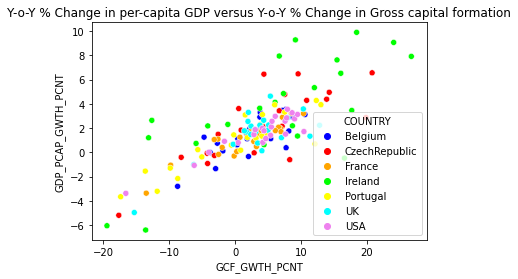

In [ ]:
colors = ['blue', 'red', 'orange', 'lime', 'yellow', 'cyan', 'violet']
 
sns.scatterplot(x=random_df['GCF_GWTH_PCNT'], 
                y=random_df['GDP_PCAP_GWTH_PCNT'],
                hue=random_df['COUNTRY'],
                palette=colors).set(title='Y-o-Y % Change in per-capita GDP versus Y-o-Y % Change in Gross capital formation')
 
plt.show()

#Laboratorio

Estudio Framingham del Corazón
Este laboratorio utiliza información publica. Es un estudio realizado sobre el riesgo cardio vascular. Este estudio se puso en marcha en 1948 con la participación inicial de 5.209 mujeres y hombres sanos de esta ciudad de entre 30 y 62 años, y en el que actualmente se incluye la tercera generación de participantes. Gracias a este estudio, que continúa siendo un referente en la actualidad, se dispone de diversos conocimientos sobre la epidemiología de los problemas cardiovasculares y los factores de riesgo asociados a su aparición.1​

Es un estudio prospectivo de base poblacional que comenzó en Framingham en 1948 con la cohorte original en el que, durante los últimos 66 años los investigadores han recogido datos sobre las enfermedades cardiovasculares y sus factores predisponentes. Es un estudio pionero en la investigación epidemiológica de las enfermedades crónicas no infecciosas y los métodos, estadísticos y de análisis e interpretación de datos, que ha utilizado, han tenido una amplia difusión en este campo. El estudio Framingham surge en un contexto y un momento que lo hicieron posible. En primer lugar hay que situar la importancia creciente de las enfermedades cardiovasculares.



### Descripción del modelo de datos.
* male: 0 = Female; 1 = Male
* age: Age at exam time.
* education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = College
* currentSmoker: 0 = nonsmoker; 1 = smoker
* cigsPerDay: number of cigarettes smoked per day (estimated average)
* BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
* prevalentStroke: 0 = Stroke not prevalent in family history; 1 = Stroke prevalent in family history
* prevalentHyp: 0 = Hypertension not prevalent in family history; 1 = Hypertension prevalent in family history
* diabetes: 0 = No; 1 = Yes
* totChol: total cholesterol (mg/dL)
* sysBP: systolic blood pressure (mmHg)
* diaBP: diastolic blood pressure (mmHg)
* BMI: BodyMass Index calculated as: Weight (kg) / Height(meter-squared)
heartRate Beats/Min (Ventricular)
* glucose: total glucose mg/dL
* TenYearCHD: 0 = Patient doesn’t have 10-year risk of future coronary heart disease; 1 = Patient has 10-year risk of future coronary heart disease
### Tipos de datos
* Sex                 object
* age                  int64
* education          float64
* currentSmoker       object
* cigsPerDay         float64
* BPMeds             float64
* prevalentStroke      int64
* prevalentHyp         int64
* diabetes            object
* totChol            float64
* sysBP              float64
* diaBP              float64
* BMI                float64
* heartRate          float64
* glucose            float64
* TenYearCHD           int64

In [15]:
import numpy as np 
import pandas as pd
import statsmodels.formula.api as smf

In [16]:
url = "https://raw.githubusercontent.com/RM-Santiago/framingham/main/framingham/framingham.csv"
df = pd.read_csv(url)


In [23]:
df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0


In [26]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4135.000000,4211.000000,4187.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,49.580189,1.979444,9.005937,0.029615,0.005896,0.310613,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,8.572942,1.019791,11.922462,0.169544,0.076569,0.462799,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


¿Existe una asociación entre la presión arterial sistólica y la edad, después de ajustar los factores de confusión relevantes?

Antes de ejecutar los números tenemos que definir una hipótesis nula y una hipótesis alternativa:

Hipótesis nula (H0): NO existe asociación entre la PAS y la edad (considerando los factores de confusión elegidos);
Alternative hypothesis (H1): There is an association between sBP and age (considering the chosen confounders).


In [27]:
model1 = smf.ols(formula='sysBP ~ age', data=df).fit() 
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     779.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.58e-157
Time:                        17:51:39   Log-Likelihood:                -18770.
No. Observations:                4240   AIC:                         3.754e+04
Df Residuals:                    4238   BIC:                         3.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.1420      1.826     44.992      0.0

R-cuadrado = 0.155, lo que significa el modelo explica el 16 % de la variabilidad de los resultados. El R-cuadrado varía de 0 a 1 y mide qué tan cerca están los datos de la línea de regresión ajustada. En otras palabras, indica con %, la variabilidad del resultado (datos de respuesta) es explicada por el modelo;
El valor F-statistic se utiliza para calcular el valor p del modelo, Prob (F-statistic), que aquí es <0,05. Esto también nos dice que Python está usando una prueba ANOVA, lo que implica una distribución F.


 Los resultados de nuestro estudio muestran una asociación positiva entre nuestro resultado, la presión arterial sistólica (sysbp), y la variable independiente, edad (encontrada en la primera columna de nuestros resultados). El coeficiente beta para esta asociación fue de 1.0128 (encontrado en la segunda columna), con un error estándar de 0.036 (encontrado en la tercera columna), y una relación t (para una distribución t) de 27.911 (encontrado en la cuarta columna). Esto da un valor p <0.001 (encontrado en la quinta columna), con un intervalo de confianza del 95% para el coeficiente beta entre 0.942 (límite inferior, encontrado en la sexta columna) y 1.084 (límite superior, encontrado en la séptima columna).

En conclusión, debido a que el valor p es menor a 0.05 y el intervalo de confianza del 95% no incluye un coeficiente beta igual a 0.0, podemos rechazar la hipótesis nula de no asociación entre la edad y la presión arterial sistólica. Esto indica que existe una relación positiva (coeficiente beta > 1,0) entre la edad y la presión arterial sistólica, que resulta ser estadísticamente significativa.

### Regresion Lineal Multiple.


In [51]:
#Creamos una columna categorica, para sexo.
df["male"]=(df["Sex"]=="male").astype(int)

In [53]:
model2 = smf.ols(formula='sysBP ~ age  + education + male + cigsPerDay + BPMeds + totChol', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     180.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.24e-203
Time:                        18:23:19   Log-Likelihood:                -17596.
No. Observations:                4007   AIC:                         3.521e+04
Df Residuals:                    4000   BIC:                         3.525e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.1446      2.449     33.137      0.0

Tenemos que estratificar las variables.

In [54]:
model3 = smf.ols(formula='sysBP ~ age + male + C(education) + cigsPerDay + BPMeds + totChol', data=df).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     135.4
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          9.75e-202
Time:                        18:24:28   Log-Likelihood:                -17595.
No. Observations:                4007   AIC:                         3.521e+04
Df Residuals:                    3998   BIC:                         3.526e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              79.0066    

Los resultados de nuestro estudio muestran que la hipótesis nula de que no hay asociación lineal entre la edad y la presión arterial sistólica (sysbp), cuando se controla por género, educación, tabaquismo, ingesta de antihipertensivos y colesterol total (es decir, cuando se controla por todas las demás covariables presentes en el modelo), se rechaza. Esto indica que existe una relación lineal positiva entre la edad y la presión arterial sistólica, que resulta ser estadísticamente significativa. Además, el coeficiente beta para esta asociación fue de 1,0128 con un intervalo de confianza del 95% para el coeficiente beta entre 0,942 (límite inferior) y 1,084 (límite superior). Esto significa que para cada unidad de aumento en la edad, la presión arterial sistólica promedio aumenta en +0.84mmHg.

Existe un patrón importante relativo a los valores p y los intervalos de confianza del 95%. Cuando el valor p es menor que 0,05, el intervalo de confianza del 95% no incluye un coeficiente beta igual a 0,0. Por el contrario, cuando el valor p es mayor o igual que 0,05, el intervalo de confianza del 95% incluye un coeficiente beta igual a 0,0.

# Actividad.

En el conjunto de datos de panel, se utilizan las siguientes variables: 
* I (aerolínea), 
* T (año), 
* PF (precio de combustible), 
* LF (factor de carga, el promedio de la utilización de la capacidad de la flota), 
* Q (salida, en millas de pasajero de ingresos, índice numérico)  
* C (costo total, en $1000). 

El conjunto de datos contiene 90 observaciones de 6 compañías de aerolíneas desde 1970 a 1984. 



### Descricpcion de los datos
En el conjunto de datos de panel, se observan los siguientes datos para las 6 aerolíneas a lo largo de los 15 años de 1970 a 1984. 

El precio del combustible (PF) es un índice y los precios de los datos muestran el precio promedio global pagado en la refinería por el combustible para aviación jet en la fecha informada. 

El factor de carga (LF) es una medida de cuánta capacidad de carga de pasajeros ha utilizado una aerolínea. Esto depende generalmente de la capacidad de asientos de vuelo, la ruta de la aerolínea, la demanda, etc. 

Las millas de pasajero de ingresos (Q) es una métrica de la industria de transporte que muestra el número de millas recorridas por los pasajeros que pagan y suele ser una estadística de tráfico de aerolíneas. 

El costo (C) depende de diversos factores, incluido el precio del combustible, el factor de carga, la depreciación y el arrendamiento, el mantenimiento de aeronaves, el trabajo y los cargos de manejo de aeropuertos.

In [63]:
df= pd.read_csv("https://raw.githubusercontent.com/sharop/CD3001B/main/clase_1/PanelData.csv")

In [64]:
df.head()

,I,T,C,Q,PF,LF
0,1,1,1140640,0.952757,106650,0.534487
1,1,2,1215690,0.986757,110307,0.532328
2,1,3,1309570,1.091980,110574,0.547736
3,1,4,1511530,1.175780,121974,0.540846
4,1,5,1676730,1.160170,196606,0.591167


* ¿Es un panel balanceado?
* ¿Es un panel corto o largo?

In [66]:
df.corr()

,I,T,C,Q,PF,LF
I,1.000000e+00,3.744889e-17,-0.708624,-0.867936,0.013294,-0.339957
T,3.744889e-17,1.000000e+00,0.500027,0.271114,0.931188,0.600149
C,-7.086242e-01,5.000271e-01,1.000000,0.926327,0.479044,0.414338
Q,-8.679359e-01,2.711141e-01,0.926327,1.000000,0.227612,0.424810
PF,1.329393e-02,9.311876e-01,0.479044,0.227612,1.000000,0.486700
LF,-3.399570e-01,6.001491e-01,0.414338,0.424810,0.486700,1.000000


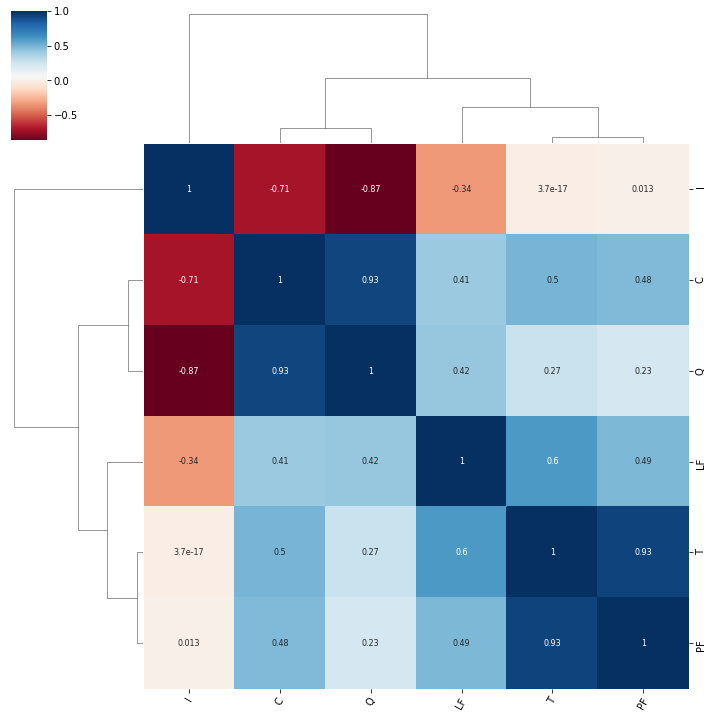

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

¿Que variables presentan la menor correlación y que variables representan la mayor correlación?

# Repaso

Revision de resultados de MCO.



In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)


Generamos una muestra de datos.

In [5]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10]) 
e = np.random.normal(size=nsample) #Error

Agregamos una columna de 1s como intercepto.

In [6]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

Realizamos la regresios.

In [8]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.083e+06
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          3.25e-244
Time:                        15:57:30   Log-Likelihood:                -134.79
No. Observations:                 100   AIC:                             275.6
Df Residuals:                      97   BIC:                             283.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1876      0.278      4.270      0.0

In [9]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [ 1.1875799   0.06751355 10.00087227]
R2:  0.9999904584846492


* $R^2$ (coeficiente de determinación) y $R^2$ Ajustado. es el porcentaje de variación explicado por la relacion entre 2 variables. Es la porcion de la varianza que que ha sido explicada por variable independiente. Proporciona una buena idea del ajuste. Proporciona una medida de la probabilidad de que el modelo prediga muestras no vistas, a través de la proporción de la varianza explicada. Un modelo constante que prediga siempre el valor esperado de y, sin tener en cuenta las características de entrada, tendrá una puntuación $R^2$ de 0,0.
Por ejemplo, si el $R^2$ es 0.90, significa que el modelo explica el 90% de la variación de la variable dependiente. Si el $R^2$ ajustado es 0.85, significa que el 85% de la variación de la variable dependiente se puede explicar por el modelo, teniendo en cuenta el número de variables independientes. Esta información es útil para evaluar si los resultados del modelo son significativos. 
Ahora supongamos que agregamos una variable independiente 'inutil', y vemos que la $R^2$ incrementa a 95%. Sucede que una limitación de $R^2$ es que aumenta al agregar variables independientes al modelo, lo cual es engañoso, ya que algunas variables agregadas pueden ser inútiles con una significación mínima. 
$R^2$ ajustado supera este problema agregando una penalización si intentamos agregar una variable independiente que no mejora el modelo.



* **Log-likelihood** en una regresión ordinaria de mínimos cuadrados (OLS) representa el logaritmo de la probabilidad de que los datos observados sean generados por el modelo. Esto se calcula como el logaritmo del producto de las probabilidades individuales de que cada observación se genere por el modelo. Por ejemplo, considere un modelo OLS que estudia la relación entre dos variables dependiente (Y) e independiente (X). Para calcular el valor Log-likelihood para este modelo, se calcula el logaritmo del producto de las probabilidades individuales de que cada observación de Y se genere por el modelo.


* F-statistic y Prob (F-statistic) son estadísticos que se utilizan para evaluar la significancia del modelo de regresión. El estadístico F se utiliza para evaluar si el modelo es significativo al comparar el $R^2$ con el $R^2$ ajustado. Esto se hace para tener en cuenta el número de variables independientes en el modelo. La probabilidad F (denotada como Prob (F-statistic)) es el valor p asociado con el estadístico F. Esto es, la probabilidad de que los resultados del modelo sean estadísticamente significativos. Por ejemplo, si el valor F-statistic es 10.85 y la Prob (F-statistic) es 0.001, significa que el modelo es estadísticamente significativo (el valor p es menor que 0.05). Esta información es útil para evaluar si los resultados del modelo son significativos. [referencia](https://youtu.be/Uh2ky5RXkeA)

* El valor AIC (Akaike Information Criteria) y BIC (Bayesian Information Criteria) son estadísticos que se utilizan para evaluar la bondad de ajuste de un modelo de regresión OLS. El valor AIC es una medida de la bondad del ajuste del modelo que toma en cuenta la complejidad del modelo. Por otro lado, el valor BIC es una medida de la bondad del ajuste del modelo que toma en cuenta tanto la complejidad como la cantidad de datos. Por lo tanto, el valor AIC es útil para modelos con pocos datos, mientras que el valor BIC es útil para modelos con muchos datos. Los resultados del modelo incluyen el valor AIC y BIC. Por ejemplo, si el valor AIC es 32.3 y el valor BIC es 38.5, significa que el modelo tiene un ajuste bueno pero no óptimo. Esta información es útil para evaluar si los resultados del modelo son significativos. [referencia](https://youtu.be/-BR4WElPIXg)

* El valor t y P<|t| son estadísticos que se utilizan para evaluar la significancia de una variable independiente en una regresión OLS. El valor t es el estadístico t para la variable independiente. Esto se calcula como la diferencia entre la media de los valores de la variable independiente y el valor esperado, dividido por el error estándar. Por otro lado, la probabilidad P<|t| es el valor p asociado con el estadístico t. Esto es, la probabilidad de que los resultados del modelo sean estadísticamente significativos.

Por ejemplo, si el valor t es 2.85 y la Prob (P<|t|) es 0.005, significa que la variable independiente es estadísticamente significativa (el valor p es menor que 0.05). Esta información es útil para evaluar si los resultados del modelo son significativos. Esto se puede hacer comparando el valor t calculado con el valor crítico para la probabilidad P<|t|. Si el valor t calculado es mayor que el valor crítico, entonces los resultados del modelo son significativos. Por otro lado, si el valor t calculado es menor que el valor crítico, los resultados no son significativos. Además, los modelos OLS también se pueden utilizar para estimar los parámetros del modelo y la varianza de los errores.

¿Que podemos hacer si tenemos un panel no balanceado o con datos faltantes?
* Cuando se tiene una panel no balanceado o con datos faltantes, hay varias opciones para tratar los datos. Una opción es rellenar los datos faltantes utilizando datos de otros paneles. Esto se conoce como imputación de datos. En algunos casos, se puede rellenar los datos faltantes utilizando técnicas de extrapolación o interpolación. Otra opción es eliminar los datos faltantes en lugar de rellenarlos. Sin embargo, esto puede reducir el tamaño de la muestra y afectar la precisión de los resultados. Por último, se puede utilizar un modelo de efectos aleatorios, que asume que los efectos de las variables X en Y varían entre las observaciones. Esto permite que el modelo tenga en cuenta los datos faltantes. Estas son algunas opciones para tratar un panel no balanceado o con datos faltantes. 